In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import string

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

# Load Dataset
df = pd.read_csv("nlp_dataset.csv")  # Change file name accordingly
# Clean column names
df.columns = df.columns.str.strip()

df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [2]:
print(df.columns)

Index(['Comment', 'Emotion'], dtype='object')


In [3]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['Comment'].apply(clean_text)
df['clean_text']


0       seriously hate one subject death feel reluctan...
1                              im full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry r feel like idiot trusting fi...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: clean_text, Length: 5937, dtype: object

In [4]:
# feature extraction
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text'])
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# naive bayes model development
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

In [6]:
# support vector machine model development
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)


In [7]:
# model comparison
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


SVM Accuracy: 0.946969696969697
              precision    recall  f1-score   support

       anger       0.93      0.96      0.94       392
        fear       0.97      0.92      0.94       416
         joy       0.95      0.96      0.95       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188

Naive Bayes Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

       anger       0.88      0.95      0.91       392
        fear       0.91      0.92      0.92       416
         joy       0.94      0.86      0.90       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



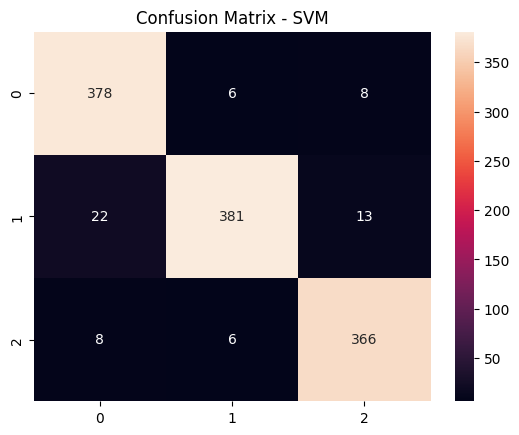

In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svm_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.show()
